# Import packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
from keras.callbacks import ModelCheckpoint
from keras.datasets import fashion_mnist
from keras.layers.core import Dense, Dropout, Activation
from keras.models import Sequential
from keras.utils import np_utils

# Load data

In [3]:
############################################################################
#       TODO: load data and split to X_train, y_train, X_test, y_test      #
############################################################################

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


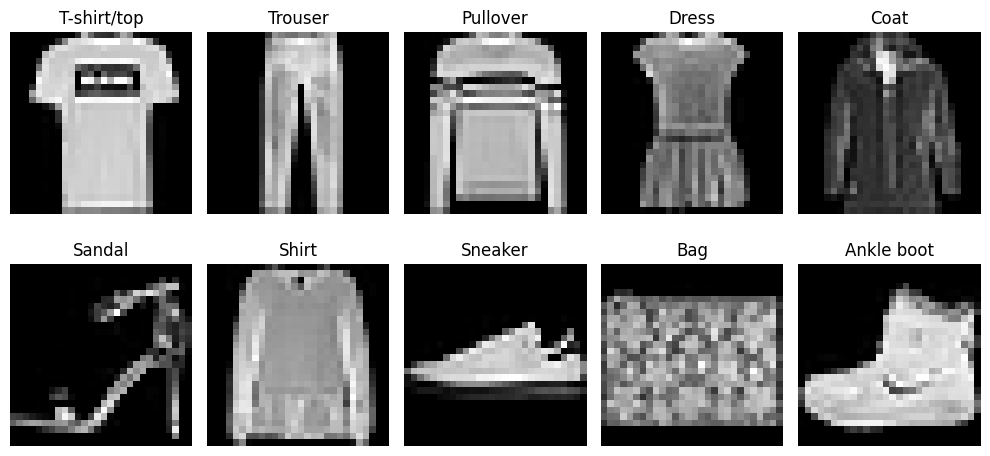

In [4]:
class_labels_dict = {0:"T-shirt/top",1:"Trouser",2:"Pullover",3:"Dress",4:"Coat",5:"Sandal",6:"Shirt",7:"Sneaker",8:"Bag",9:"Ankle boot"}

############################################################################
#         TODO: show some examples of the training data with lanels       #
############################################################################

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 5))
axes = axes.flatten()

for i in range(10):
    img = X_train[y_train == i][0].reshape(28, 28)
    label = class_labels_dict[i]

    axes[i].imshow(img,cmap='gray')
    axes[i].set_title(label)
    axes[i].axis('off')

plt.tight_layout()
plt.show()


# Format the data

In [5]:
##########################################################################################
#TODO: reshape the input so that each 28x28 image becomes a single 784 dimensional vector#
##########################################################################################

X_train = X_train.reshape(X_train.shape[0], 784)
X_test = X_test.reshape(X_test.shape[0], 784)

print("Training matrix shape:", X_train.shape)
print("Testing matrix shape:", X_test.shape)


Training matrix shape: (60000, 784)
Testing matrix shape: (10000, 784)


We also normalise the inputs so that pixel values are in the [0-1] range rather than [0-255].

In [6]:
##############################################################################################
# TODO: normalise the inputs so that pixel values are in the [0-1] range rather than [0-255] #
##############################################################################################

X_train = X_train / 255.0
X_test = X_test / 255.0

print("Training matrix shape:", X_train.shape)
print("Testing matrix shape:", X_test.shape)

Training matrix shape: (60000, 784)
Testing matrix shape: (10000, 784)


In [7]:
####################################################################################################
# TODO: Convert 1-dimensional class arrays to 10-dimensional class matrices using one-hot encoding #
####################################################################################################

from keras.utils import to_categorical

Y_train = to_categorical(y_train, num_classes=10)
Y_test = to_categorical(y_test, num_classes=10)

print("Training class matrix shape:", Y_train.shape)
print("Testing class matrix shape:", Y_test.shape)


Training class matrix shape: (60000, 10)
Testing class matrix shape: (10000, 10)


# Build the neural network

In [9]:
#################################################
#     TODO: build a fully connected network     #
#################################################
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(784,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


# Compile the model

In [10]:
###############################################################################
#  TODO: compile a model with cross entropy loss function  and adam optimizer #
###############################################################################

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
###################################################
#     TODO: fit your model on the training set    #
###################################################

history = model.fit(X_train, Y_train, batch_size=64, epochs=10, validation_split=0.2)


Epoch 1/10
750/750 [==============================] - 5s 5ms/step - loss: 0.5320 - accuracy: 0.8120 - val_loss: 0.4615 - val_accuracy: 0.8392
Epoch 2/10
750/750 [==============================] - 5s 7ms/step - loss: 0.3896 - accuracy: 0.8585 - val_loss: 0.3820 - val_accuracy: 0.8618
Epoch 3/10
750/750 [==============================] - 4s 5ms/step - loss: 0.3470 - accuracy: 0.8718 - val_loss: 0.3501 - val_accuracy: 0.8707
Epoch 4/10
750/750 [==============================] - 4s 5ms/step - loss: 0.3229 - accuracy: 0.8805 - val_loss: 0.3386 - val_accuracy: 0.8747
Epoch 5/10
750/750 [==============================] - 4s 5ms/step - loss: 0.3033 - accuracy: 0.8893 - val_loss: 0.3414 - val_accuracy: 0.8777
Epoch 6/10
750/750 [==============================] - 5s 7ms/step - loss: 0.2875 - accuracy: 0.8926 - val_loss: 0.3397 - val_accuracy: 0.8757
Epoch 7/10
750/750 [==============================] - 3s 5ms/step - loss: 0.2722 - accuracy: 0.8984 - val_loss: 0.3471 - val_accuracy: 0.8775
Epoch 

# Evaluate Performance

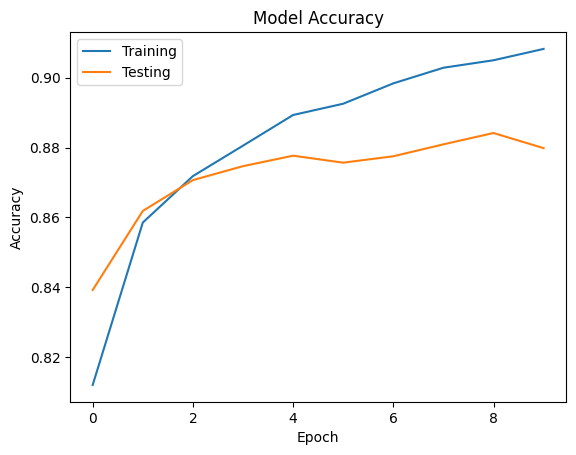

In [12]:
############################################################################
#       TODO: Plot the accuracy during the training and testing epochs     #
############################################################################

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Testing'], loc='upper left')
plt.show()


In [15]:
############################################################################
#   TODO: Print the best accuracy in the test set and its training step    #
############################################################################
best_test_accuracy = max(history.history['val_accuracy'])
best_test_accuracy_index = history.history['val_accuracy'].index(best_test_accuracy)
best_training_step = best_test_accuracy_index + 1

print("Best accuracy in the test set:", best_test_accuracy)
print("Training step for the best accuracy:", best_training_step)


Best accuracy in the test set: 0.8841666579246521
Training step for the best accuracy: 9


# Inspecting the output

313/313 [==============================] - 1s 2ms/step


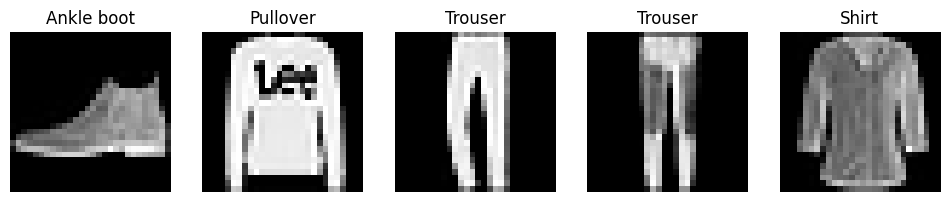

In [16]:
##########################################################################################
# TODO: Draw some examples of the test set where the model predicts correctly with label #
##########################################################################################

predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

num_examples = 5
indices = np.where(predicted_labels == y_test)[0][:num_examples]

fig, axes = plt.subplots(1, num_examples, figsize=(12, 4))
for i, index in enumerate(indices):
    axes[i].imshow(X_test[index].reshape(28, 28), cmap='gray')
    axes[i].set_title(class_labels_dict[predicted_labels[index]])
    axes[i].axis('off')

plt.show()


313/313 [==============================] - 1s 2ms/step


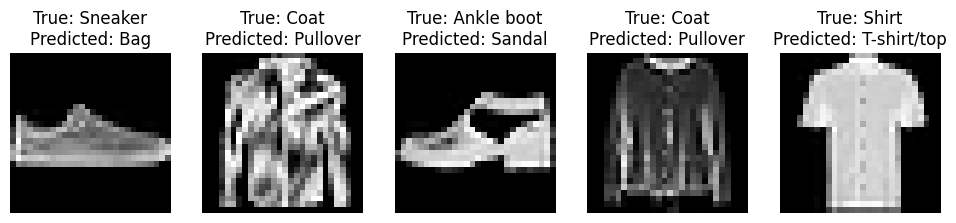

In [17]:
#####################################################################################################
#  TODO: Draw some examples of the test set where the model predicts incorrectly with correct label #
#####################################################################################################
import numpy as np
import matplotlib.pyplot as plt

# Get predictions on the test set
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

# Draw examples of incorrect predictions
num_examples = 5
incorrect_indices = np.where(predicted_labels != y_test)[0][:num_examples]

fig, axes = plt.subplots(1, num_examples, figsize=(12, 4))
for i, index in enumerate(incorrect_indices):
    axes[i].imshow(X_test[index].reshape(28, 28), cmap='gray')
    axes[i].set_title(f"True: {class_labels_dict[y_test[index]]}\nPredicted: {class_labels_dict[predicted_labels[index]]}")
    axes[i].axis('off')

plt.show()


In [18]:
from sklearn.metrics import classification_report, confusion_matrix

############################################################################################################################################
# TODO: show precision, recall, f1-score, for each class and avg whith The classification_report function from the sklearn.metrics library #
############################################################################################################################################

predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

report = classification_report(y_test, predicted_labels, target_names=list(class_labels_dict.values()))

print(report)


313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.81      0.85      0.83      1000
     Trouser       0.97      0.98      0.97      1000
    Pullover       0.80      0.75      0.78      1000
       Dress       0.82      0.92      0.87      1000
        Coat       0.83      0.70      0.76      1000
      Sandal       0.97      0.95      0.96      1000
       Shirt       0.66      0.68      0.67      1000
     Sneaker       0.93      0.95      0.94      1000
         Bag       0.96      0.97      0.97      1000
  Ankle boot       0.96      0.94      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



313/313 [==============================] - 1s 3ms/step


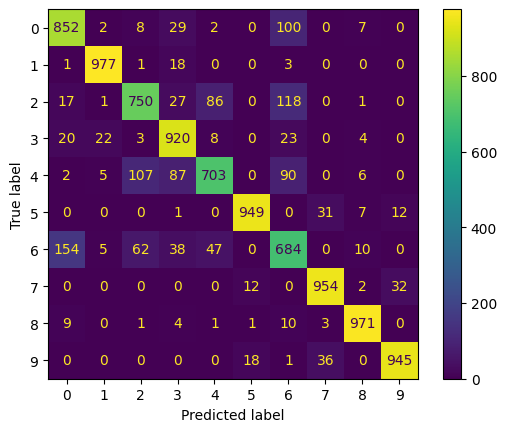

In [20]:
#########################################################
#           TODO: show confusion matrix                 #
#########################################################
from sklearn.metrics import ConfusionMatrixDisplay
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)
cm = confusion_matrix(y_test, predicted_labels)
ConfusionMatrixDisplay.from_predictions(y_test, predicted_labels)
plt.show()